### Imports

In [1]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [2]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [3]:
names = ['ppm'] + ['t' + str(nb) for nb in range(1, 1024)]

In [4]:
data = pd.read_csv('../data/sacharose_1000/all.csv', sep = '\t').iloc[:,:-1]

In [5]:
data.columns = names

In [6]:
def load_spectrum(data, moment_of_time):
    ppm = data['ppm']
    intensity = data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

In [7]:
sp1 = load_spectrum(data, 1)
sp1023 = load_spectrum(data, 1023)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


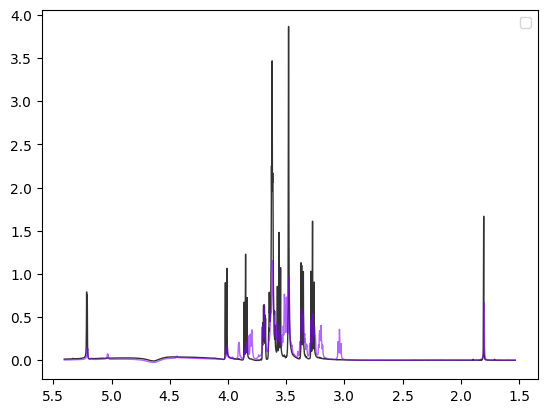

In [8]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([sp1, sp1023], profile=True)

### Estimation

In [36]:
kappa = 0.1
kappa_th = 1

In [10]:
proportions_in_times = []
noise_proportions_in_times = []

sp1 = load_spectrum(data, 1)
sp1.trim_negative_intensities()
sp1.normalize()

for i in range(2, 1024):
    print('This is timepoint '+str(i)+'.\n')
    current = load_spectrum(data, i)
    previous = load_spectrum(data, i-1)
    estimation = estimate_proportions(current, [previous], what_to_compare='area',
                                      solver=pulp.GUROBI(msg=False),
                                     MTD=kappa, MTD_th=kappa_th)

    proportions_in_times.append(estimation['proportions'])
    noise_proportions_in_times.append(estimation['proportion_of_noise_in_components'])
    
    print('Proportions:\n')
    print(estimation['proportions'])
    print('\n')
    print('Proportion_of_noise_in_components:\n')
    print(estimation['proportion_of_noise_in_components'])
    print('\n')

This is timepoint 2.

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-13


/home/basia/.local/lib/python3.10/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9993668751760026]


Proportion_of_noise_in_components:

0.010629382790000027


This is timepoint 3.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9786133515209973]


Proportion_of_noise_in_components:

0.0016680751509999953


This is timepoint 4.

The mixture's spectrum cannot contain negative intensities. 
Settin

Proportions:

[0.996109676133998]


Proportion_of_noise_in_components:

0.0006613854579999987


This is timepoint 20.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9959088438220026]


Proportion_of_noise_in_components:

0.01475851367300004


This is timepoint 21.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9800549949120028]


Proportion_of_noise_in_compone

Proportions:

[0.9951807605040002]


Proportion_of_noise_in_components:

0.007314582891000002


This is timepoint 38.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9707765490090026]


Proportion_of_noise_in_components:

0.0019227836810000053


This is timepoint 39.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9985570353660032]


Proportion_of_noise_in_compo

Proportions:

[0.9993670561549935]


Proportion_of_noise_in_components:

0.013465863536999913


This is timepoint 56.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9928767860019971]


Proportion_of_noise_in_components:

0.0005573786549999983


This is timepoint 57.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9952472663239955]


Proportion_of_noise_in_compo

Proportions:

[0.9826590973999986]


Proportion_of_noise_in_components:

0.0049493458609999935


This is timepoint 74.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9971727522109952]


Proportion_of_noise_in_components:

0.0008252189749999961


This is timepoint 75.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9971766276280042]


Proportion_of_noise_in_comp

Proportions:

[0.9978360412739993]


Proportion_of_noise_in_components:

0.002305899064999998


This is timepoint 92.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9938575875869987]


Proportion_of_noise_in_components:

0.0009041172169999988


This is timepoint 93.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9987279131699938]


Proportion_of_noise_in_compo

Proportions:

[0.9948630452550025]


Proportion_of_noise_in_components:

0.009202146008000022


This is timepoint 110.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9932631417000048]


Proportion_of_noise_in_components:

0.0003868526870000019


This is timepoint 111.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9884423648659997]


Proportion_of_noise_in_com

Proportions:

[0.9906501726339976]


Proportion_of_noise_in_components:

0.003704125445999991


This is timepoint 128.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9987151850750042]


Proportion_of_noise_in_components:

0.004904964574000021


This is timepoint 129.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9918553712879955]


Proportion_of_noise_in_comp

Proportions:

[0.9911366683110007]


Proportion_of_noise_in_components:

0.0004672490430000003


This is timepoint 146.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9986916519380071]


Proportion_of_noise_in_components:

0.04130708133700029


This is timepoint 147.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9670823338899931]


Proportion_of_noise_in_comp

Proportions:

[0.9948520620890031]


Proportion_of_noise_in_components:

0.032503165022000104


This is timepoint 164.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9838903750299999]


Proportion_of_noise_in_components:

0.004738006170999999


This is timepoint 165.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9971563144780082]


Proportion_of_noise_in_comp

Proportions:

[0.9944146929990038]


Proportion_of_noise_in_components:

6.737591400000026e-05


This is timepoint 182.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9998974455990073]


Proportion_of_noise_in_components:

0.013875741880000103


This is timepoint 183.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9881052451829972]


Proportion_of_noise_in_com

Proportions:

[0.9745001008839994]


Proportion_of_noise_in_components:

0.002056765137999999


This is timepoint 200.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9978691097589941]


Proportion_of_noise_in_components:

0.014221806799999917


This is timepoint 201.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.992218313560002]


Proportion_of_noise_in_compo

Proportions:

[0.9977744431679993]


Proportion_of_noise_in_components:

0.019734909301999986


This is timepoint 218.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9912925206530047]


Proportion_of_noise_in_components:

0.00041717044200000194


This is timepoint 219.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9991839399419941]


Proportion_of_noise_in_co

Proportions:

[0.9871572651420047]


Proportion_of_noise_in_components:

0.005799566848000029


This is timepoint 236.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.983183968437002]


Proportion_of_noise_in_components:

8.625828200000017e-05


This is timepoint 237.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9996338348170002]


Proportion_of_noise_in_comp

Proportions:

[0.9962913213910022]


Proportion_of_noise_in_components:

0.012354415535000027


This is timepoint 254.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.990538798846996]


Proportion_of_noise_in_components:

0.00023885375799999906


This is timepoint 255.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9798437836299942]


Proportion_of_noise_in_com

Proportions:

[0.9943045063440011]


Proportion_of_noise_in_components:

0.0015374446300000018


This is timepoint 272.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9992774653299988]


Proportion_of_noise_in_components:

0.011902192249999987


This is timepoint 273.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9977363133950029]


Proportion_of_noise_in_com

Proportions:

[0.9907544580540057]


Proportion_of_noise_in_components:

0.004773663967000028


This is timepoint 290.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9951414603289959]


Proportion_of_noise_in_components:

0.006013405180999976


This is timepoint 291.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9973281940329994]


Proportion_of_noise_in_comp

Proportions:

[0.995848798399998]


Proportion_of_noise_in_components:

0.0009097850649999982


This is timepoint 308.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9987910307520003]


Proportion_of_noise_in_components:

0.0023121036120000004


This is timepoint 309.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9966995865350049]


Proportion_of_noise_in_com

Proportions:

[0.9803650208919985]


Proportion_of_noise_in_components:

0.0001999085219999997


This is timepoint 326.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9989829836589992]


Proportion_of_noise_in_components:

0.01436875053799999


This is timepoint 327.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9949470012540056]


Proportion_of_noise_in_comp

Proportions:

[0.9594314150739977]


Proportion_of_noise_in_components:

0.0014879972209999963


This is timepoint 344.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9969461872550044]


Proportion_of_noise_in_components:

0.0021320820670000097


This is timepoint 345.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9966502623350018]


Proportion_of_noise_in_co

Proportions:

[0.9873796725759976]


Proportion_of_noise_in_components:

0.0


This is timepoint 362.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9574440537539923]


Proportion_of_noise_in_components:

0.004776032865999962


This is timepoint 363.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9985617138600016]


Proportion_of_noise_in_components:

0.001825

Proportions:

[0.9906773038550049]


Proportion_of_noise_in_components:

0.0003259474570000016


This is timepoint 380.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9995968023309942]


Proportion_of_noise_in_components:

0.00531425290999997


This is timepoint 381.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9991038652040037]


Proportion_of_noise_in_comp

Proportions:

[0.9978289762190016]


Proportion_of_noise_in_components:

0.03041222396300005


This is timepoint 398.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9516550610449953]


Proportion_of_noise_in_components:

0.0041881340299999795


This is timepoint 399.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9903051178110013]


Proportion_of_noise_in_comp

Proportions:

[0.9997455974679964]


Proportion_of_noise_in_components:

0.020399504889999927


This is timepoint 416.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9866200925610025]


Proportion_of_noise_in_components:

0.0008944899010000022


This is timepoint 417.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.988092204640002]


Proportion_of_noise_in_comp

Proportions:

[0.9842087199119943]


Proportion_of_noise_in_components:

0.00029813974699999826


This is timepoint 434.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9554486043610002]


Proportion_of_noise_in_components:

0.0035801837350000008


This is timepoint 435.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9996904270779983]


Proportion_of_noise_in_c

Proportions:

[0.9927070743389945]


Proportion_of_noise_in_components:

0.0004379320129999976


This is timepoint 452.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9992356783350012]


Proportion_of_noise_in_components:

0.01570893996500002


This is timepoint 453.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9638967995360015]


Proportion_of_noise_in_comp

Proportions:

[0.9988948226019995]


Proportion_of_noise_in_components:

0.03475446228299998


This is timepoint 470.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9519366457560005]


Proportion_of_noise_in_components:

0.002256105104000001


This is timepoint 471.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9976559313400017]


Proportion_of_noise_in_compo

Proportions:

[0.9912018047950004]


Proportion_of_noise_in_components:

0.0008333180980000004


This is timepoint 488.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9753568384970045]


Proportion_of_noise_in_components:

0.005465754233000025


This is timepoint 489.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.993287719041994]


Proportion_of_noise_in_comp

Proportions:

[0.9962096012000016]


Proportion_of_noise_in_components:

0.00634207610300001


This is timepoint 506.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9903637619429996]


Proportion_of_noise_in_components:

0.0006602211109999997


This is timepoint 507.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9938813776719955]


Proportion_of_noise_in_comp

Proportions:

[0.9998092356809986]


Proportion_of_noise_in_components:

0.02897505349899996


This is timepoint 524.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.972591747877999]


Proportion_of_noise_in_components:

0.000962109557999999


This is timepoint 525.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9805211816569988]


Proportion_of_noise_in_compon

Proportions:

[0.9971357105780067]


Proportion_of_noise_in_components:

0.03158215892500021


This is timepoint 542.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9861013050259975]


Proportion_of_noise_in_components:

0.0028058131149999925


This is timepoint 543.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9940523333419979]


Proportion_of_noise_in_comp

Proportions:

[0.9927726902019995]


Proportion_of_noise_in_components:

0.0025144278689999988


This is timepoint 560.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9970743125730029]


Proportion_of_noise_in_components:

0.07333487336600021


This is timepoint 561.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9234358739359987]


Proportion_of_noise_in_comp

Proportions:

[0.998761629919002]


Proportion_of_noise_in_components:

0.008405582423000017


This is timepoint 578.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9969269993529989]


Proportion_of_noise_in_components:

0.0030985187559999967


This is timepoint 579.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9741395695010064]


Proportion_of_noise_in_comp

Proportions:

[0.9966737773700008]


Proportion_of_noise_in_components:

0.00025111875100000024


This is timepoint 596.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9936241347440018]


Proportion_of_noise_in_components:

0.0018896191820000033


This is timepoint 597.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9946374901950062]


Proportion_of_noise_in_c

Proportions:

[0.9948782531609907]


Proportion_of_noise_in_components:

0.1168161929119989


This is timepoint 614.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.8876279851369984]


Proportion_of_noise_in_components:

0.005560469246999989


This is timepoint 615.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.991986994395002]


Proportion_of_noise_in_compone

Proportions:

[0.9875366773349992]


Proportion_of_noise_in_components:

0.0036224070489999974


This is timepoint 632.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9973116219689964]


Proportion_of_noise_in_components:

0.0023241154109999913


This is timepoint 633.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9967702785329942]


Proportion_of_noise_in_co

Proportions:

[0.9836505504650003]


Proportion_of_noise_in_components:

0.006449871400000002


This is timepoint 650.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9909150724050011]


Proportion_of_noise_in_components:

0.001872719425000002


This is timepoint 651.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9984302503860031]


Proportion_of_noise_in_comp

Proportions:

[0.9987465237890029]


Proportion_of_noise_in_components:

0.003134090864000009


This is timepoint 668.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9861561979960006]


Proportion_of_noise_in_components:

0.004325789140000003


This is timepoint 669.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9961694871070049]


Proportion_of_noise_in_comp

Proportions:

[0.9979841895069976]


Proportion_of_noise_in_components:

0.00830905483599998


This is timepoint 686.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9893934032060018]


Proportion_of_noise_in_components:

0.0024323478890000043


This is timepoint 687.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9966133294569969]


Proportion_of_noise_in_comp

Proportions:

[0.9980579689090087]


Proportion_of_noise_in_components:

0.00033160486700000287


This is timepoint 704.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9899128202540044]


Proportion_of_noise_in_components:

0.006247356829000027


This is timepoint 705.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.993922772754002]


Proportion_of_noise_in_com

Proportions:

[0.9968037996380005]


Proportion_of_noise_in_components:

0.002232131743000001


This is timepoint 722.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9988433160910022]


Proportion_of_noise_in_components:

0.0054061200160000124


This is timepoint 723.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9971842305830009]


Proportion_of_noise_in_com

Proportions:

[0.9986774633270034]


Proportion_of_noise_in_components:

0.0017608209600000059


This is timepoint 740.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9976634781760022]


Proportion_of_noise_in_components:

0.0035771941540000077


This is timepoint 741.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9899559639680042]


Proportion_of_noise_in_co

Proportions:

[0.9995090235930002]


Proportion_of_noise_in_components:

0.009027533719000001


This is timepoint 758.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9887164473510033]


Proportion_of_noise_in_components:

0.0008735998730000029


This is timepoint 759.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.995122112698004]


Proportion_of_noise_in_comp

Proportions:

[0.9975733428410009]


Proportion_of_noise_in_components:

0.005227379032000004


This is timepoint 776.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9912673467189924]


Proportion_of_noise_in_components:

0.001564099555999988


This is timepoint 777.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9981965426640023]


Proportion_of_noise_in_comp

Proportions:

[0.9997324216739963]


Proportion_of_noise_in_components:

0.009939236279999963


This is timepoint 794.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9958385438170035]


Proportion_of_noise_in_components:

0.0037983772030000134


This is timepoint 795.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9988493440700016]


Proportion_of_noise_in_com

Proportions:

[0.9978617487060015]


Proportion_of_noise_in_components:

0.002597827835000004


This is timepoint 812.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9925457146209918]


Proportion_of_noise_in_components:

0.0024311595159999797


This is timepoint 813.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9997142778140049]


Proportion_of_noise_in_com

Proportions:

[0.9986659325670098]


Proportion_of_noise_in_components:

0.0020149045170000197


This is timepoint 830.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9999999999999913]


Proportion_of_noise_in_components:

0.004944118660999958


This is timepoint 831.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9988167959819998]


Proportion_of_noise_in_com

Proportions:

[0.9868047388339998]


Proportion_of_noise_in_components:

0.0020308893559999996


This is timepoint 848.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9925386895130037]


Proportion_of_noise_in_components:

0.003682154277000014


This is timepoint 849.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9961558992230046]


Proportion_of_noise_in_com

Proportions:

[0.9988499063509971]


Proportion_of_noise_in_components:

0.012078550206999964


This is timepoint 866.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9824181841489966]


Proportion_of_noise_in_components:

0.001451988973999995


This is timepoint 867.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9960369061139965]


Proportion_of_noise_in_comp

Proportions:

[0.9829988297549965]


Proportion_of_noise_in_components:

0.0009997879289999965


This is timepoint 884.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9952056049499977]


Proportion_of_noise_in_components:

0.0011296562189999973


This is timepoint 885.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9918948168730002]


Proportion_of_noise_in_co

Proportions:

[0.9638264043330075]


Proportion_of_noise_in_components:

0.0006649949960000052


This is timepoint 902.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9949250527219972]


Proportion_of_noise_in_components:

0.0018564825819999946


This is timepoint 903.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.999619980570995]


Proportion_of_noise_in_com

Proportions:

[0.9972128923529995]


Proportion_of_noise_in_components:

0.0004386739359999998


This is timepoint 920.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9999408422880048]


Proportion_of_noise_in_components:

0.005304383335000026


This is timepoint 921.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9994843431069972]


Proportion_of_noise_in_com

Proportions:

[0.9960512349890013]


Proportion_of_noise_in_components:

0.003903677635000005


This is timepoint 938.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9998158735369999]


Proportion_of_noise_in_components:

0.0047313876949999995


This is timepoint 939.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.996884580734004]


Proportion_of_noise_in_comp

Proportions:

[0.9949178433899977]


Proportion_of_noise_in_components:

0.001642702603999996


This is timepoint 956.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9991736498040027]


Proportion_of_noise_in_components:

0.016617326363000045


This is timepoint 957.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9943668424039963]


Proportion_of_noise_in_comp

Proportions:

[0.9969863649959954]


Proportion_of_noise_in_components:

0.006826764123999968


This is timepoint 974.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9985636475820056]


Proportion_of_noise_in_components:

0.008207148644000045


This is timepoint 975.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9857481957669965]


Proportion_of_noise_in_comp

Proportions:

[0.9995778437510051]


Proportion_of_noise_in_components:

0.02147871412200011


This is timepoint 992.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9866721044559992]


Proportion_of_noise_in_components:

0.0001408444239999999


This is timepoint 993.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9973651456430018]


Proportion_of_noise_in_comp

Proportions:

[0.9993164134579983]


Proportion_of_noise_in_components:

0.006059157731999989


This is timepoint 1010.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.999184904322999]


Proportion_of_noise_in_components:

0.0016652625429999983


This is timepoint 1011.

The mixture's spectrum cannot contain negative intensities. 
Setting negative intensities to zero.
The mixture's spectrum is not normalized.
Normalizing mixture's spectrum.
Component's spectrum 0 cannot contain negative intensities.
Setting negative intensities to zero.
Component's spectrum 0 is not normalized
Normalizing component's spectrum 0.
Proportions:

[0.9991906809139999]


Proportion_of_noise_in_co

In [11]:
len(proportions_in_times)

1022

In [12]:
max([prop[0] for prop in proportions_in_times])

0.9999999999999983

In [13]:
min([prop[0] for prop in proportions_in_times])

0.8876279851369984

In [14]:
rel_proportions = [1]
for i, prop in enumerate(proportions_in_times):
    rel_proportions.append(rel_proportions[-1]*prop[0])

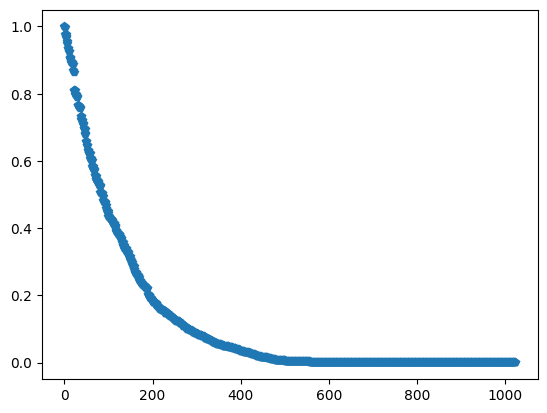

In [15]:
plt.plot(range(1+len(proportions_in_times)), rel_proportions, 'p')

In [16]:
prop = [prop[0] for prop in proportions_in_times]

In [17]:
with open('../results/sacharose_1000/comparing_with_previous/unknown_substrats/proportions_in_times_'+str(kappa)+'_'+str(kappa_th)+'.pkl', 'wb') as f:
    pickle.dump(prop, f)

In [18]:
with open('../results/sacharose_1000/comparing_with_previous/unknown_substrats/noise_proportions_in_times_'+str(kappa)+'_'+str(kappa_th)+'.pkl', 'wb') as f:
    pickle.dump(noise_proportions_in_times, f)

### Reading the results

In [37]:
with open(r'../results/sacharose_1000/comparing_with_previous/unknown_substrats/proportions_in_times_'+str(kappa)+'_'+str(kappa_th)+'.pkl', 'rb') as f:
    y = pickle.load(f)
    y = np.array(y).reshape(-1,1)